## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('premiums_rest.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610


In [3]:
df['Genetical_Risk'] = 0

In [4]:
df.shape

(29904, 14)

In [5]:
df.columns = df.columns.str.replace(' ',"_").str.lower()
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


## 2. EDA and Data Cleaning

### 2.1 Handle Missing Values

In [6]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           9
employment_status        1
income_level             9
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

### 2.2 Handle Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,29886.000000,29886.000000,29886.000000,29886.000000,29886.0
mean,43.396105,2.379910,23.364184,20892.303821,0.0
std,13.412657,1.431201,24.740339,6936.813440,0.0
min,26.000000,-3.000000,1.000000,3625.000000,0.0
25%,34.000000,1.000000,7.000000,15697.250000,0.0
50%,42.000000,3.000000,17.000000,20489.000000,0.0
75%,52.000000,3.000000,32.000000,26360.000000,0.0
max,356.000000,5.000000,930.000000,43471.000000,0.0


### 2.3 Data Cleaning: number_of_dependants
-We can see some negative values in number_of_dependants. We can replace them with positive numbers

In [11]:
df[df['number_of_dependants']<0].shape

(50, 14)

In [12]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-1, -3])

In [13]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df['number_of_dependants'].describe()

count    29886.000000
mean         2.385933
std          1.421137
min          0.000000
25%          1.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: number_of_dependants, dtype: float64

### 2.4 Numeric Columns

#### 2.4.1 Univariate Analysis: Numeric Columns

#### Box plots for numeric columns

In [14]:
df.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
genetical_risk            int64
dtype: object

In [15]:
numeric_cols = df.select_dtypes(include=['float64','Int64']).columns
numeric_cols

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

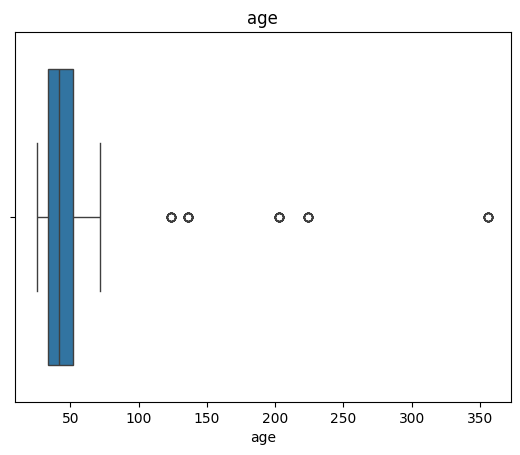

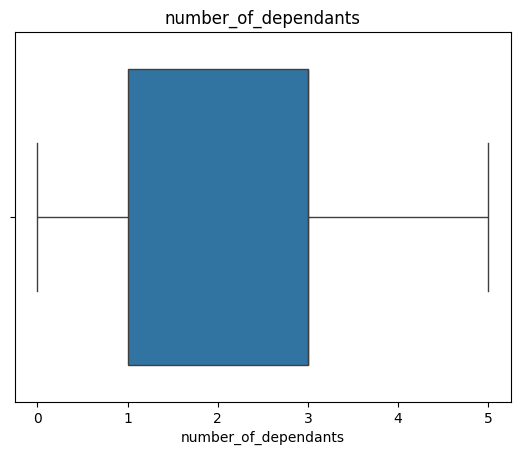

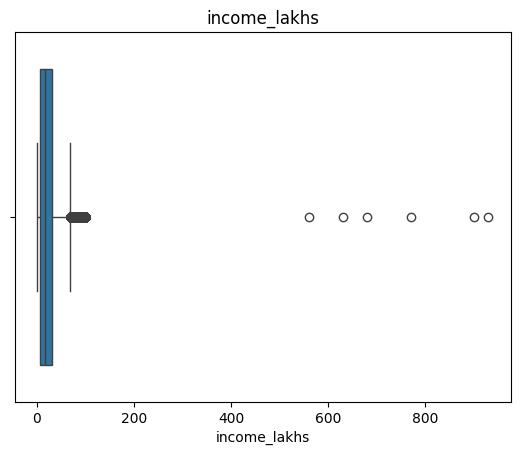

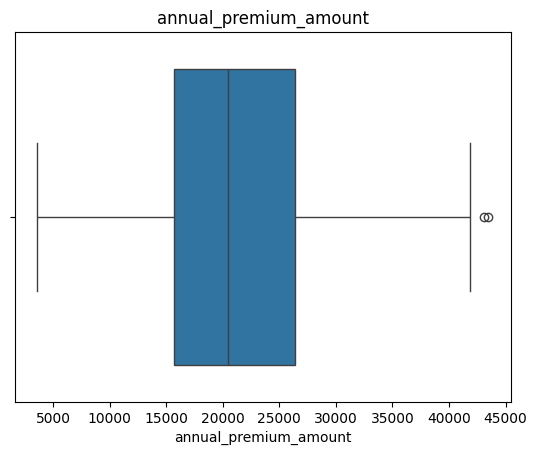

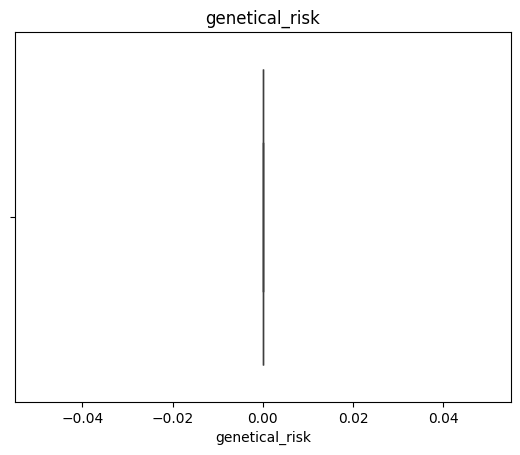

In [16]:
for col in numeric_cols:
    sns.boxplot(data = df, x = col)
    plt.title(col)
    plt.show()

#### 2.4.2 Outlier Treatment: Age Column

In [17]:
df[df['age']>100].shape

(58, 14)

In [18]:
df[df['age']>100]['age'].unique()

array([224, 124, 136, 203, 356])

In [19]:
df1 = df[df['age']<=100].copy()
print(df1.shape)
df1['age'].describe()

(29828, 14)


count    29828.000000
mean        43.095380
std         11.041991
min         26.000000
25%         34.000000
50%         42.000000
75%         52.000000
max         72.000000
Name: age, dtype: float64

#### 2.4.3 Outlier Treatment: Income Column

In [20]:
df['income_lakhs'].describe()

count    29886.000000
mean        23.364184
std         24.740339
min          1.000000
25%          7.000000
50%         17.000000
75%         32.000000
max        930.000000
Name: income_lakhs, dtype: float64

In [21]:
def get_iqr_bound(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return lower_bound, upper_bound

In [22]:
lower, upper = get_iqr_bound(df1['income_lakhs'])
lower,upper

(-30.5, 69.5)

In [23]:
df1[df1['income_lakhs']>upper].shape

(2090, 14)

- There will be many legimate records beyond the upper limit so we decide to use the quantile bound

In [24]:
quantile_threshold = df1['income_lakhs'].quantile(0.999)
quantile_threshold

np.float64(100.0)

In [25]:
df1[df1['income_lakhs']>quantile_threshold].shape

(6, 14)

In [26]:
df2  = df1[df1['income_lakhs']<=quantile_threshold].copy()
df2.shape

(29822, 14)

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')


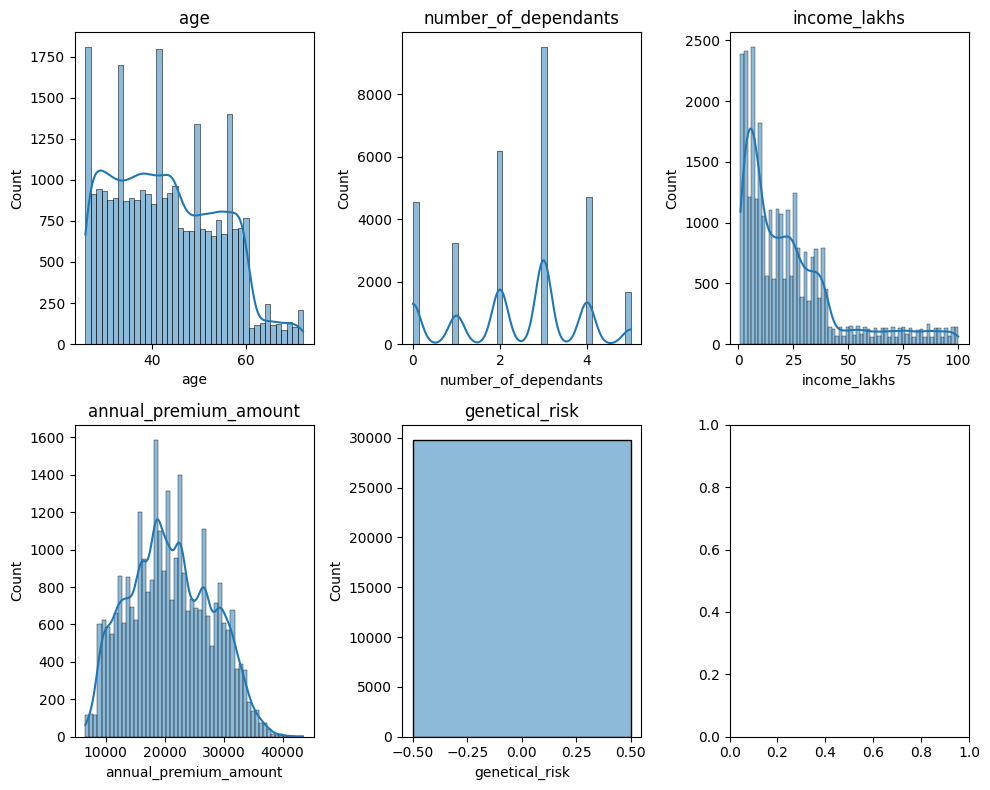

In [27]:
print(numeric_cols)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_cols):
    ax = axs[i//3, i%3]  # Determines the position of the subplot in the grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [28]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0


#### 2.4.4 Bivariate Analysis: Numeric Columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'genetical_risk'], dtype='object')


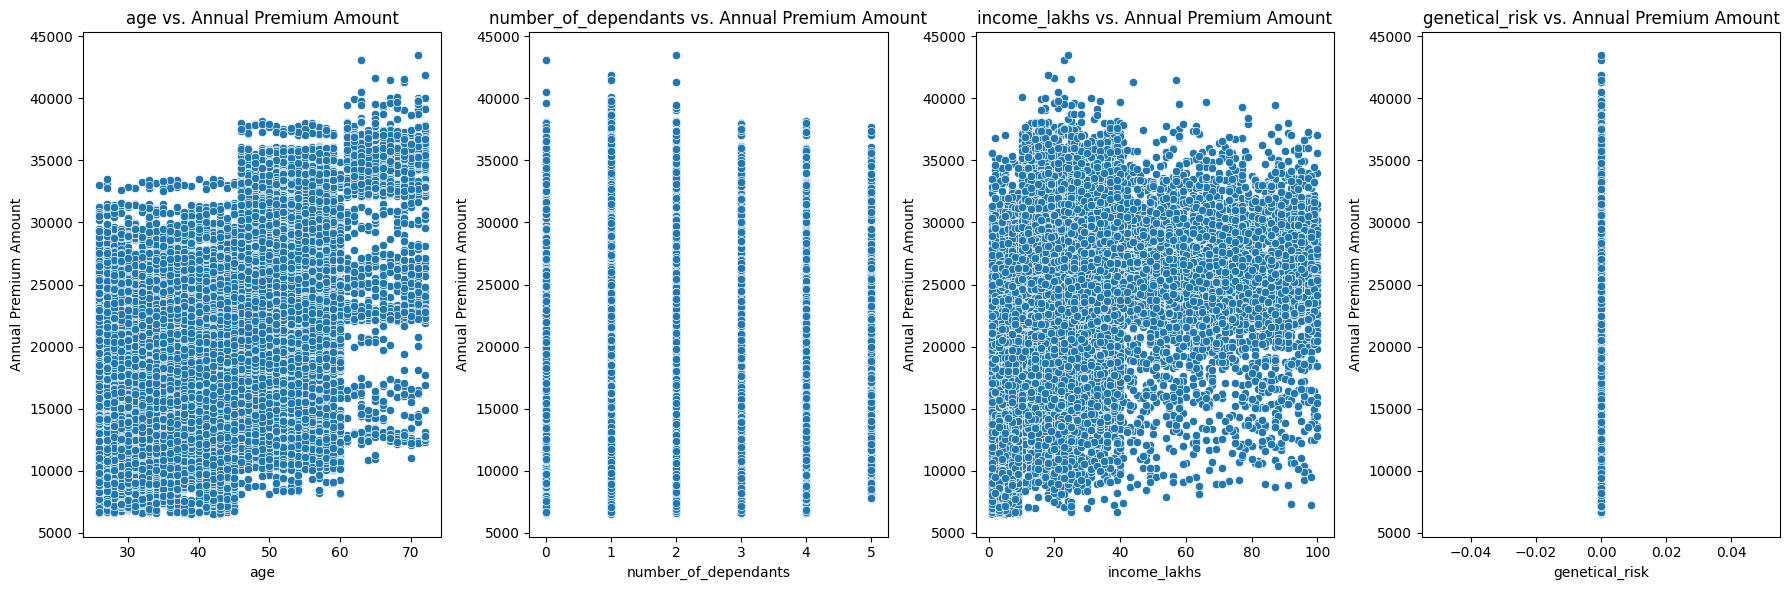

In [29]:
numerical_features =  numeric_cols.drop('annual_premium_amount')
print(numerical_features)

fig, axes = plt.subplots(1, len(numerical_features), figsize=(18, 6))  # Adjust figure size as necessary

for ax, column in zip(axes, numerical_features):
    sns.scatterplot(x=df2[column], y=df2['annual_premium_amount'], ax=ax)
    ax.set_title(f'{column} vs. Annual Premium Amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annual Premium Amount')

plt.tight_layout()  # Adjust layout
plt.show()

### 2.5 Categorical Columns

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [31]:
for col in cat_cols:
    print(f"{col} :- {df2[col].unique()}")

gender :- ['Male' 'Female']
region :- ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status :- ['Unmarried' 'Married']
bmi_category :- ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status :- ['No Smoking' 'Regular' 'Occasional' 'Does Not Smoke' 'Not Smoking'
 'Smoking=0']
employment_status :- ['Salaried' 'Self-Employed' 'Freelancer']
income_level :- ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history :- ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan :- ['Bronze' 'Silver' 'Gold']


#### 2.5.1 Making Smoking_status feature Uniform

In [32]:
df2['smoking_status'] = df2['smoking_status'].replace({
    'Smoking=0':'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking'
})
df2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

#### 2.5.2 Univarate Analysis

In [33]:
pct = df2['gender'].value_counts(normalize=True)*100
pct

gender
Male      54.912481
Female    45.087519
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

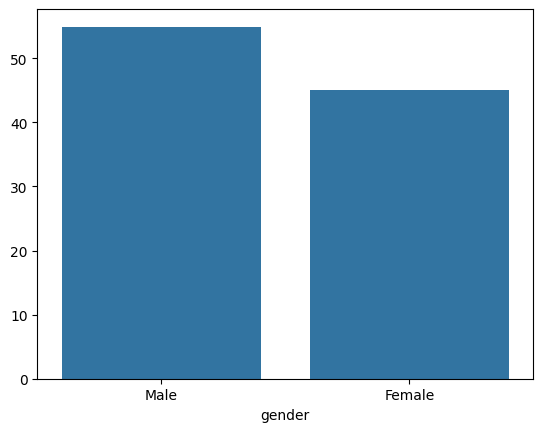

In [34]:
sns.barplot(x=pct.index, y = pct.values)

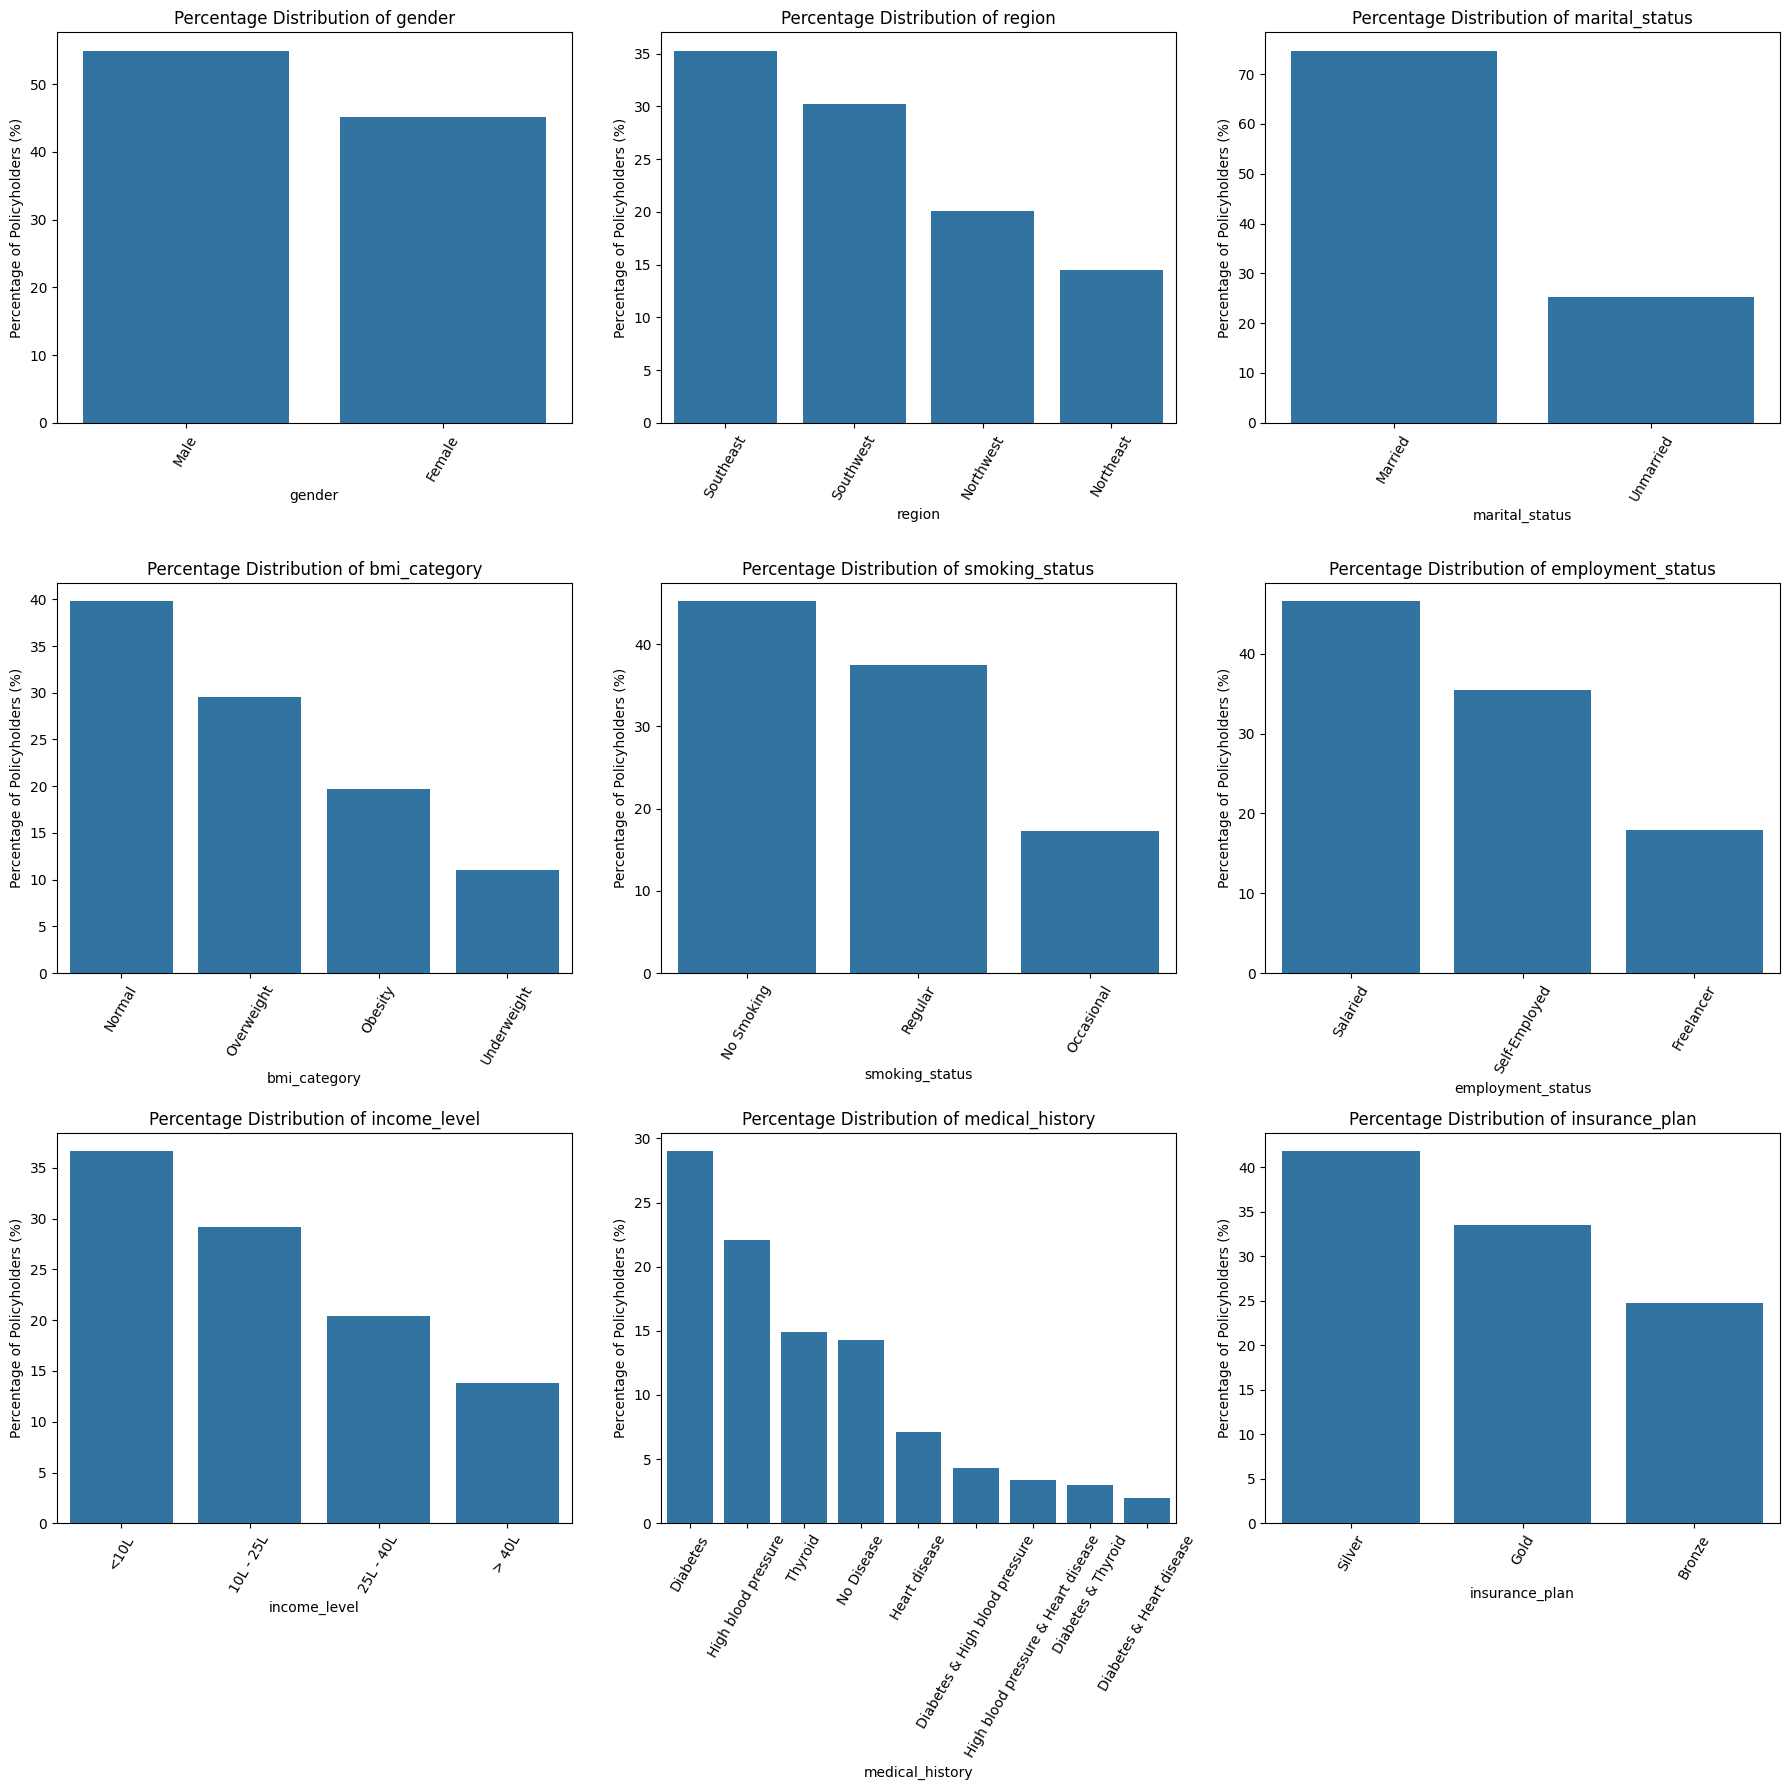

In [35]:

fig, axes = plt.subplots(3, 3, figsize=(18, 18))  # Adjust figure size as necessary
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

for ax, column in zip(axes, cat_cols):
    # Calculate the percentage distribution of each category
    category_counts = df2[column].value_counts(normalize=True) * 100  # normalize=True gives the relative frequencies
    
    # Plotting the distribution using barplot
    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholders (%)')
    ax.tick_params(axis='x', rotation=60)
    ax.set_xlabel(column)  # Set xlabel to the column name for clarity

plt.tight_layout()  # Adjusts plot parameters for better fit in the figure window
plt.show()

#### 2.5.3 Bivariate Analysis

In [36]:
crosstab = pd.crosstab(df2['income_level'],df2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,799,3554,4354
25L - 40L,301,2631,3142
<10L,6054,527,4341
> 40L,214,3287,618


<Axes: xlabel='income_level'>

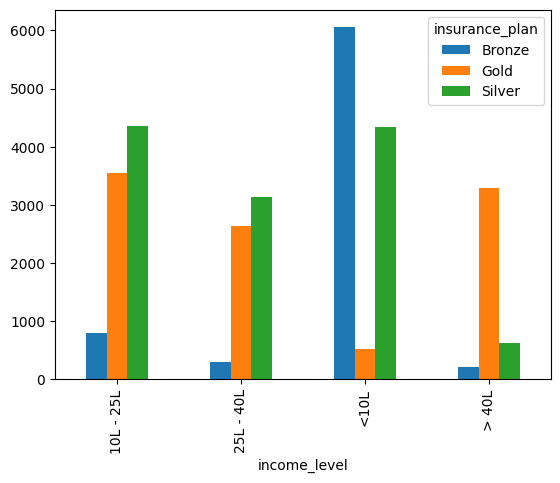

In [37]:
crosstab.plot(kind='bar')

<Axes: xlabel='insurance_plan', ylabel='income_level'>

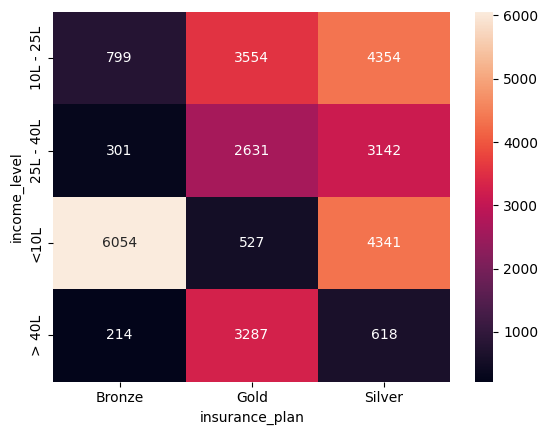

In [38]:
sns.heatmap(crosstab,annot=True,fmt='d')

## 3. Feature Engineering

In [39]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0


In [40]:
df['medical_history'].unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

### 3.1 Medical History to Risk Score

In [41]:
risk_score = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [42]:
df2[['disease1','disease2']] = df['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
21795,59,Female,Southwest,Unmarried,0,Normal,No Smoking,Self-Employed,25L - 40L,34,High blood pressure,Bronze,10887,0,high blood pressure,None
27763,51,Female,Northwest,Married,3,Obesity,Occasional,Salaried,<10L,2,Diabetes,Silver,23778,0,diabetes,None
10811,50,Male,Southeast,Unmarried,1,Normal,Regular,Freelancer,> 40L,68,No Disease,Gold,27115,0,no disease,None
14410,58,Male,Southeast,Unmarried,0,Overweight,Occasional,Self-Employed,10L - 25L,10,No Disease,Gold,27344,0,no disease,None
5828,42,Male,Southeast,Married,3,Overweight,Regular,Salaried,25L - 40L,38,Thyroid,Silver,20571,0,thyroid,None


In [43]:
df2['disease1'] = df2['disease1'].fillna('none')
df2['disease2'] = df2['disease2'].fillna('none')
df2['total_rist_score'] = 0
df2.sample(2)


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_rist_score
25050,29,Female,Southwest,Married,3,Overweight,Occasional,Freelancer,> 40L,74,Diabetes & High blood pressure,Gold,27328,0,diabetes,high blood pressure,0
8628,60,Male,Southeast,Married,3,Underweight,No Smoking,Self-Employed,25L - 40L,30,High blood pressure,Gold,27154,0,high blood pressure,none,0


In [44]:
for disease in ['disease1','disease2']:
    df2['total_rist_score'] += df2[disease].map(risk_score)
    
df2['total_rist_score'].describe()

count    29822.000000
mean         5.969217
std          3.361170
min          0.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         14.000000
Name: total_rist_score, dtype: float64

In [45]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_rist_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6


In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2['normalized_rist_score'] = scaler.fit_transform(df2[['total_rist_score']])

df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_rist_score,normalized_rist_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,0,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,0,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,0,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,0,no disease,none,0,0.000000
4,56,Male,Northeast,Married,3,Obesity,Occasional,Self-Employed,10L - 25L,14,Diabetes,Bronze,15610,0,diabetes,none,6,0.428571


### 3.2 Insurance Plan Label Encoding

In [47]:
df2['insurance_plan'].unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [48]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1,'Silver':2, 'Gold':3})
df2['insurance_plan'].unique()

array([1, 2, 3])

### 3.3 Income Level Label Encoding

In [49]:
df2['income_level'].unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [50]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '> 40L':4, '25L - 40L':3})
df2['income_level'].unique()

array([1, 2, 4, 3])

### 3.3 One Hot Encoding

In [51]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,0,diabetes,none,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,0,diabetes,none,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,0,high blood pressure,none,...,0,0,0,0,0,0,0,0,0,1


## 4. Feature Selection

In [52]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_rist_score'],axis=1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,56,3,2,14,1,15610,0,0.428571,1,0,0,0,0,1,0,0,1,0,0,1


## 5. Check Multicolinearity

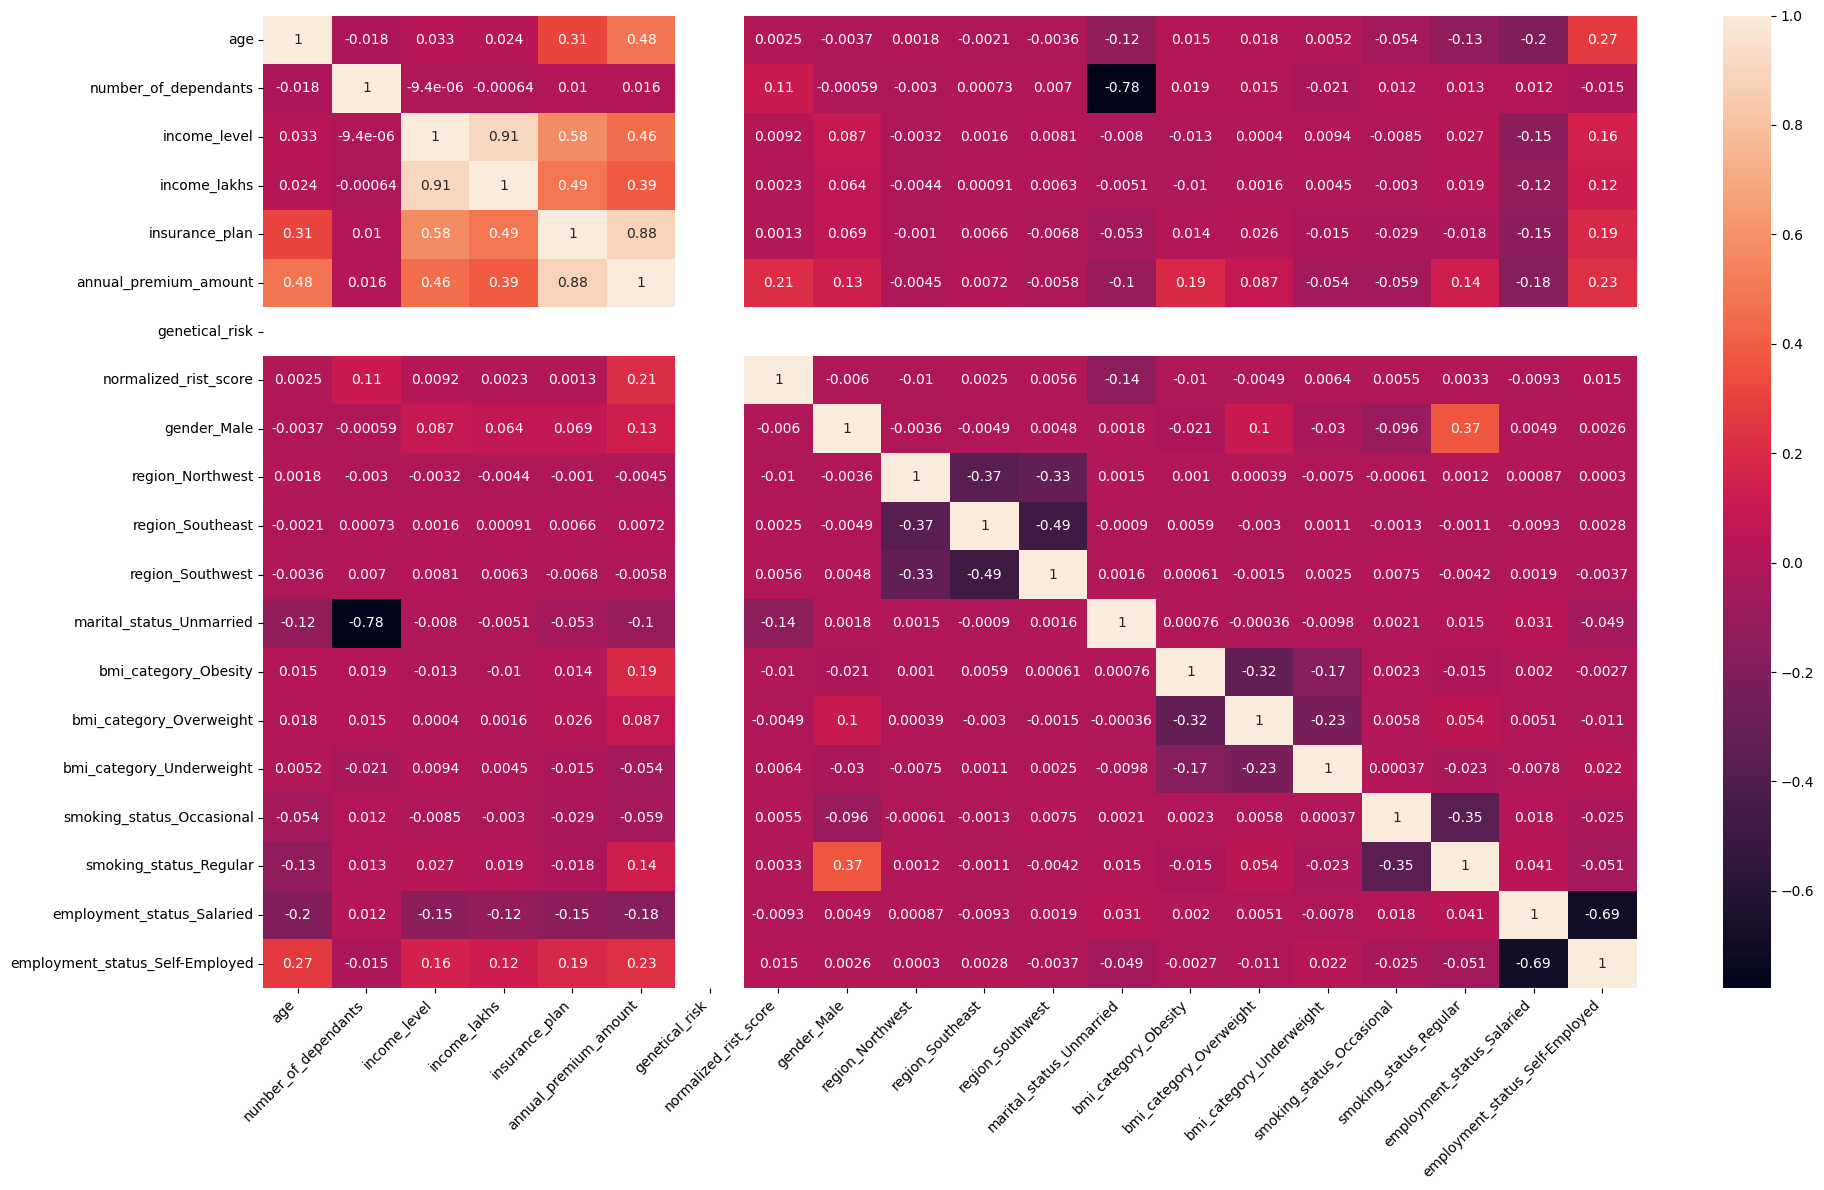

In [53]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [54]:
X = df4.drop(columns=['annual_premium_amount'],axis=1)
y = df4['annual_premium_amount']


In [55]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.0,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000,29822.000000
mean,0.371628,0.477547,0.371225,0.224509,0.544112,0.0,0.426373,0.549125,0.200691,0.352693,0.301992,0.253336,0.196835,0.295051,0.110087,0.173228,0.374656,0.466132,0.354269
std,0.240053,0.284129,0.351111,0.226822,0.379009,0.0,0.240084,0.497589,0.400524,0.477816,0.459129,0.434929,0.397613,0.456073,0.313003,0.378450,0.484042,0.498860,0.478299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.200000,0.000000,0.060606,0.500000,0.0,0.357143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.347826,0.600000,0.333333,0.161616,0.500000,0.0,0.428571,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.565217,0.600000,0.666667,0.313131,1.000000,0.0,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [57]:
calculate_vif(X)

e:\Personal Files\Learning Programming\Data Science\Projects\ML_Regression_Premium_Prediction\.env\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.921783
1,number_of_dependants,6.278938
2,income_level,13.890522
3,income_lakhs,11.185596
4,insurance_plan,5.271297
5,genetical_risk,NaN
6,normalized_rist_score,3.810619
7,gender_Male,2.599098
8,region_Northwest,2.123965
9,region_Southeast,2.980842


In [58]:
calculate_vif(X.drop(columns=['income_level'],axis=1))

e:\Personal Files\Learning Programming\Data Science\Projects\ML_Regression_Premium_Prediction\.env\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,Column,VIF
0,age,3.863055
1,number_of_dependants,6.278147
2,income_lakhs,2.678102
3,insurance_plan,4.574625
4,genetical_risk,NaN
5,normalized_rist_score,3.808345
6,gender_Male,2.591439
7,region_Northwest,2.123277
8,region_Southeast,2.979899
9,region_Southwest,2.708641


- we will drop income_lakhs due to high VIF value

In [59]:
X_reduced = X.drop('income_level', axis="columns")

## 6. Model Training

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (20875, 18)
x test:  (8947, 18)
y train:  (20875,)
y test:  (8947,)


### 6.1 Linear Regression

In [61]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
train_score = model_lr.score(X_train,y_train)
test_score = model_lr.score(X_test,y_test)
train_score,test_score

(0.9530815646744318, 0.9546117251336063)

In [62]:
from sklearn.metrics import mean_squared_error

y_pred = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression ==> MSE: ", mse_lr, "RMSE: ", rmse_lr)

Linear Regression ==> MSE:  2183801.881857191 RMSE:  1477.7692248308567


In [63]:
model_lr.intercept_

np.float64(5923.857616247891)

#### 6.1.1 Feature Importance

In [64]:
model_lr.coef_

array([ 7.01439497e+03, -1.24779338e+03, -7.48504739e+02,  1.48400763e+04,
        1.13686838e-12,  6.02914743e+03,  4.27658037e+01, -7.61656567e+01,
       -2.50833169e+01, -5.33377920e+01, -7.02171931e+02,  3.93046263e+03,
        1.99907429e+03,  5.98455259e+02,  8.55180317e+02,  2.81679153e+03,
       -7.34601338e+01,  2.48754208e+02])

In [65]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'genetical_risk', 'normalized_rist_score', 'gender_Male',
       'region_Northwest', 'region_Southeast', 'region_Southwest',
       'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [66]:
feature_importane = model_lr.coef_
coeff_df = pd.DataFrame(data = feature_importane, index=X_test.columns, columns=['Coeffiecient'])
coeff_df = coeff_df.sort_values(by=['Coeffiecient'],ascending=False)
coeff_df

,Coeffiecient
insurance_plan,1.484008e+04
age,7.014395e+03
normalized_rist_score,6.029147e+03
bmi_category_Obesity,3.930463e+03
smoking_status_Regular,2.816792e+03
bmi_category_Overweight,1.999074e+03
smoking_status_Occasional,8.551803e+02
bmi_category_Underweight,5.984553e+02
employment_status_Self-Employed,2.487542e+02
gender_Male,4.276580e+01


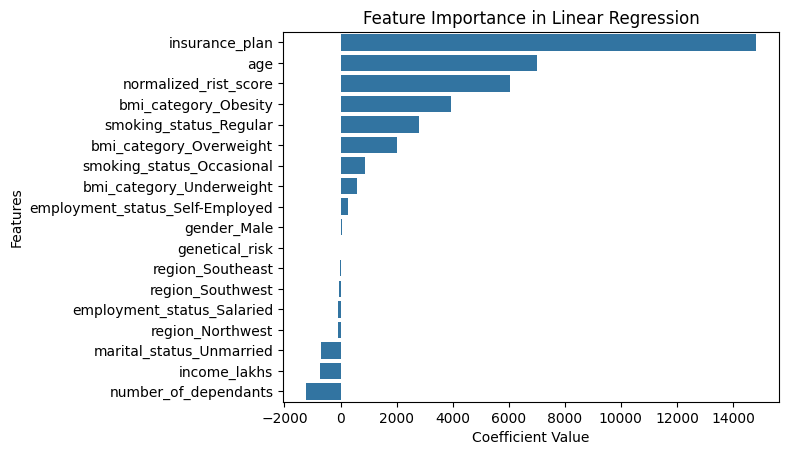

In [67]:
sns.barplot(data  = coeff_df , y = coeff_df.index, x = 'Coeffiecient')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Linear Regression')
plt.show()

### 6.2 Rigde Regression

- No Significate Improvement in the score

In [68]:
from sklearn.linear_model import Ridge,Lasso
model_ridge = Ridge(alpha=5)
model_ridge.fit(X_train,y_train)
train_score = model_ridge.score(X_train,y_train)
test_score = model_ridge.score(X_test,y_test)
train_score,test_score

(0.9530773827759621, 0.9546113588026404)

In [69]:
y_pred = model_ridge.predict(X_test)

mse_rg = mean_squared_error(y_test, y_pred)
rmse_rg = np.sqrt(mse_lr)
print("Ridge Regression ==> MSE: ", mse_rg, "RMSE: ", rmse_rg)

Ridge Regression ==> MSE:  2183819.507428006 RMSE:  1477.7692248308567


### 6.3 XGBoost

In [70]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb .fit(X_train,y_train)
train_score = model_xgb .score(X_train,y_train)
test_score = model_xgb.score(X_test,y_test)
train_score,test_score

(0.9986407160758972, 0.9980074167251587)

In [71]:
y_pred = model_xgb.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBOOST ==> MSE: ", mse_xgb, "RMSE: ", rmse_xgb)

XGBOOST ==> MSE:  95870.8515625 RMSE:  309.6301851604588


#### 6.3.1 Hyperparameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=1)
random_search.fit(X_train, y_train)
random_search.best_score_

np.float64(0.9970021843910217)

In [73]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [74]:
best_model = random_search.best_estimator_
best_model

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


#### 6.3.2 Feature Importance
- Intrepretation is not as straight as Linear Model

In [75]:
feature_importane = best_model.feature_importances_

coeff_df = pd.DataFrame(data = feature_importane, index=X_test.columns, columns=['Coeffiecient'])
coeff_df = coeff_df.sort_values(by=['Coeffiecient'],ascending=False)
coeff_df

,Coeffiecient
insurance_plan,0.876606
age,0.041879
normalized_rist_score,0.021755
bmi_category_Obesity,0.020722
smoking_status_Regular,0.018973
bmi_category_Overweight,0.013879
smoking_status_Occasional,0.004253
bmi_category_Underweight,0.001878
employment_status_Salaried,0.000027
income_lakhs,0.000011


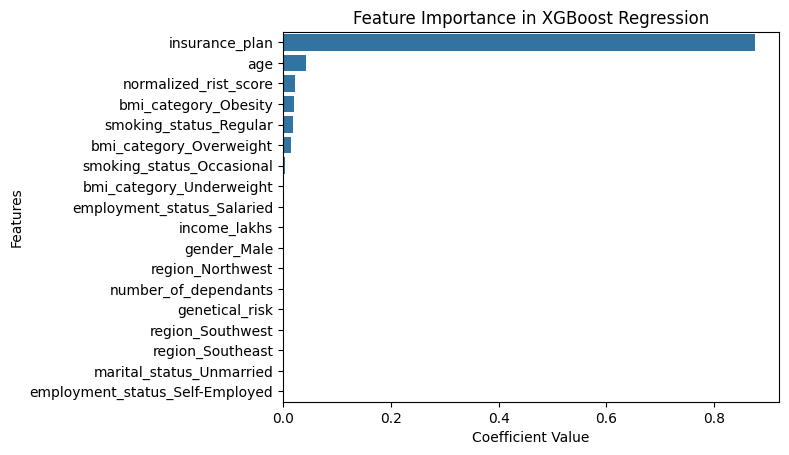

In [76]:
sns.barplot(data  = coeff_df , y = coeff_df.index, x = 'Coeffiecient')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Regression')
plt.show()

## 7 Error Analysis

In [77]:
y_pred = best_model.predict(X_test)

residuals =y_pred - y_test
residuals_pct = residuals * 100 / y_test

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
5495,30838,31168.615234,330.615234,1.072103
582,26306,26138.769531,-167.230469,-0.635712
281,17983,17611.283203,-371.716797,-2.067046
15443,19345,18925.240234,-419.759766,-2.169862
24281,33317,33256.734375,-60.265625,-0.180886


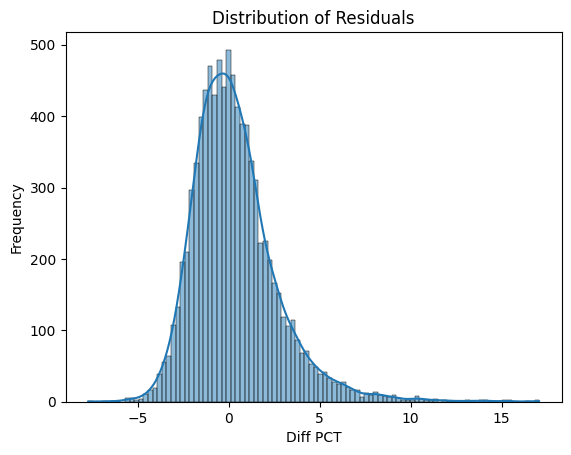

In [78]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [79]:
X_test.shape

(8947, 18)

### 7.1 More than 10% 

In [80]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
17866,6909,7653.522949,744.522949,10.776132
252,7633,8430.017578,797.017578,10.441734
11864,6924,7653.522949,729.522949,10.536149
16263,8206,9144.170898,938.170898,11.432743
28595,7580,8430.017578,850.017578,11.213952


In [81]:
extreme_results_df.shape

(45, 4)

In [82]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

0.5029618866659216

- We have 0.5% extreme errors which means for 0.5% customers we will either overcharge or undercharge by 10% or more

### 7.2 More than 50%
- There will be 0 customers whom we will overcharge or underchage by more than 50%

In [83]:
extreme_results_df[abs(extreme_results_df.diff_pct)>50].sort_values("diff_pct",ascending=False)

,actual,predicted,diff,diff_pct


### 7.3 More Analysis in Daya

In [84]:
X_test.index

Index([ 5495,   582,   281, 15443, 24281, 13879, 23869,  9985,  1989, 29096,
       ...
        9378, 21318, 11748, 12471, 27270, 12305,  2117, 23521, 29683, 11077],
      dtype='int64', length=8947)

In [85]:
extreme_results_df.index

Index([17866,   252, 11864, 16263, 28595, 14286,  8506,  6137, 11779,   508,
        7028, 29165,  8216, 25617, 27518,  2037, 12841, 11019, 22549, 12005,
        5588, 11231,  9150, 14521, 26591, 29657, 26994,  7509,  1648,  8270,
       10020,  6369,  7508, 15413, 18834, 21455, 22941, 17811, 21399, 21910,
       15581, 11189,  5179, 19807,  5348],
      dtype='int64')

In [86]:
extreme_error_df = X_test.loc[extreme_results_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,normalized_rist_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
17866,0.152174,0.6,0.060606,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0
252,0.065217,0.6,0.020202,0.0,0.0,0.0,1,0,1,0,0,0,0,0,1,0,0,0
11864,0.043478,0.2,0.020202,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,0,1,0
16263,0.673913,0.6,0.383838,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0
28595,0.217391,0.0,0.303030,0.0,0.0,0.0,0,0,0,1,1,0,0,0,1,0,0,1


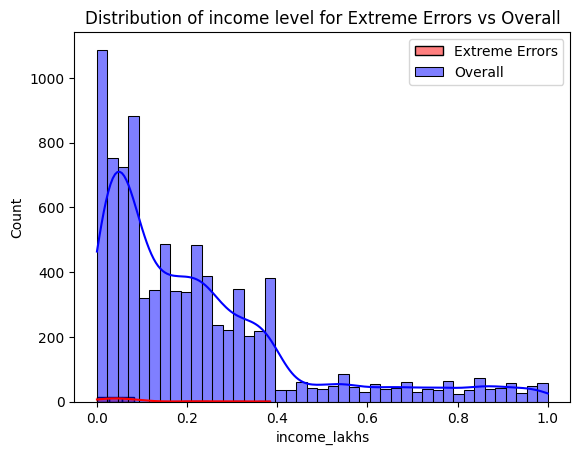

In [87]:
sns.histplot(extreme_error_df['income_lakhs'], color='red', label='Extreme Errors', kde=True)
sns.histplot(X_test['income_lakhs'], color='blue', label='Overall', alpha=0.5, kde=True)
plt.legend()
plt.title(f'Distribution of income level for Extreme Errors vs Overall')
plt.show()

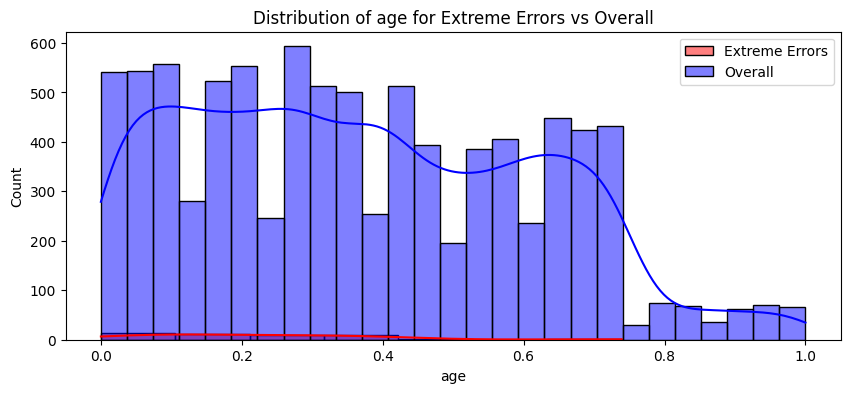

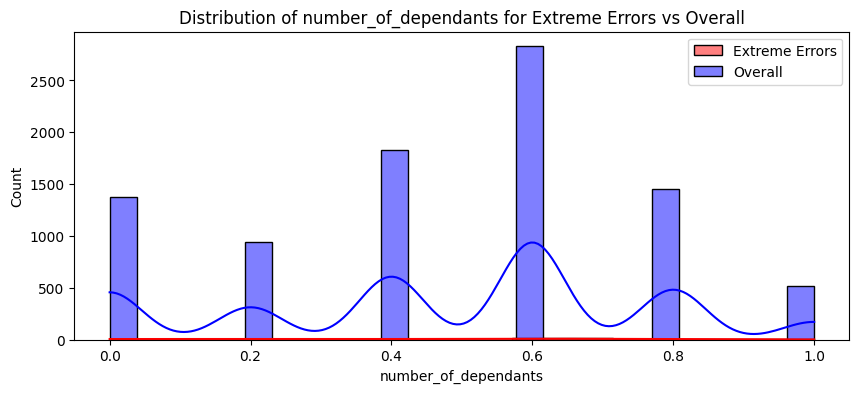

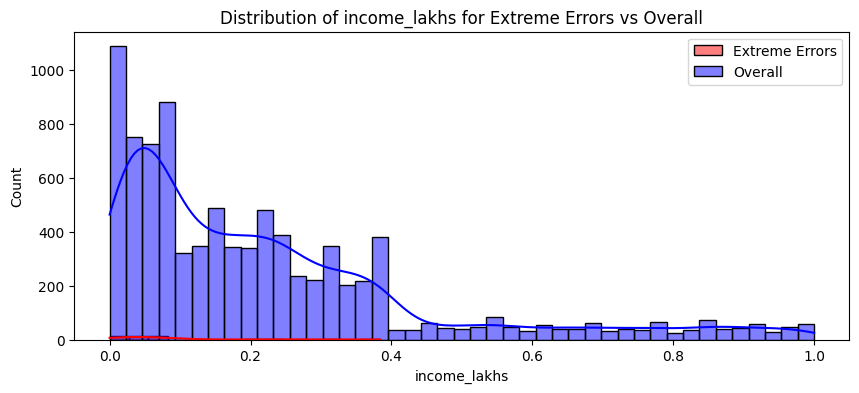

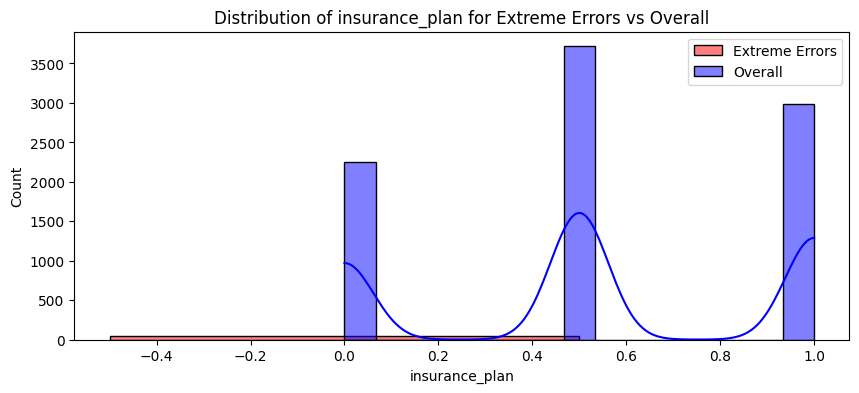

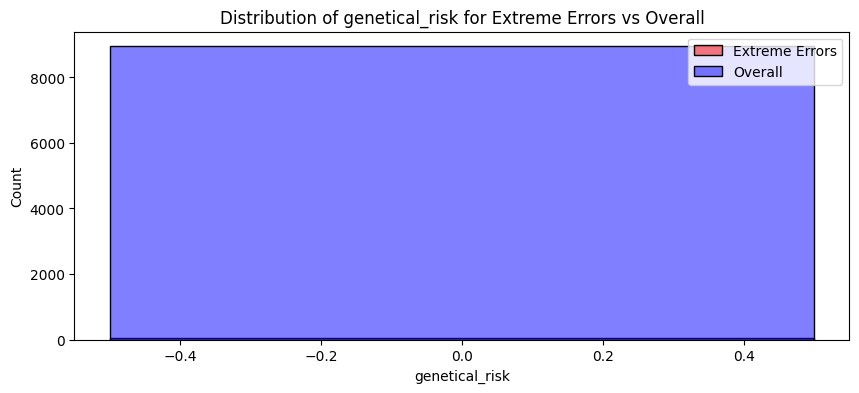

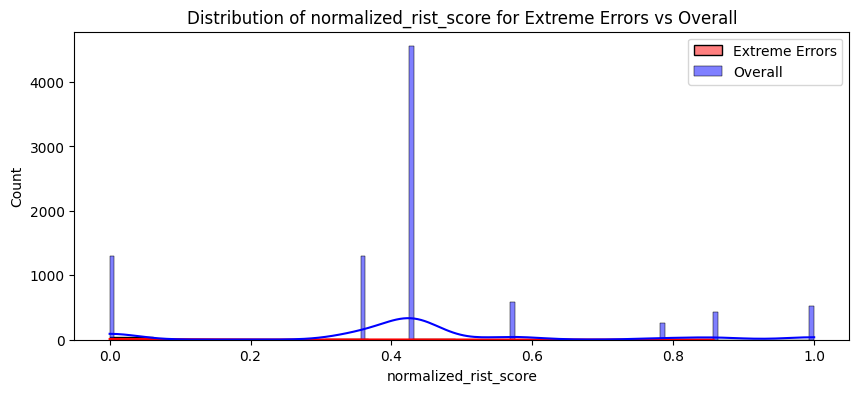

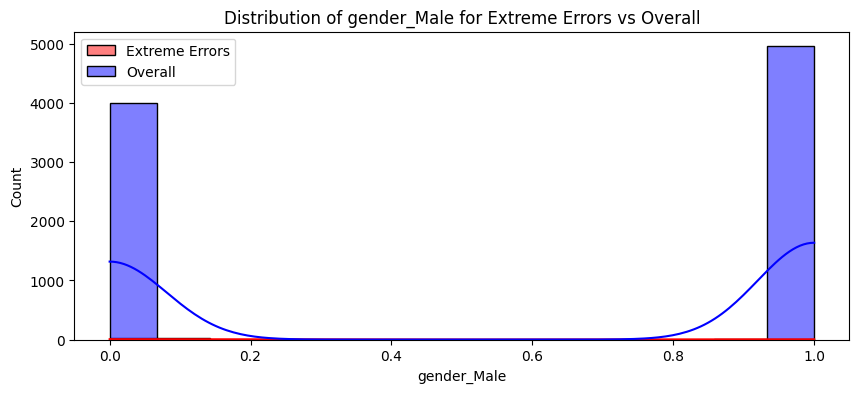

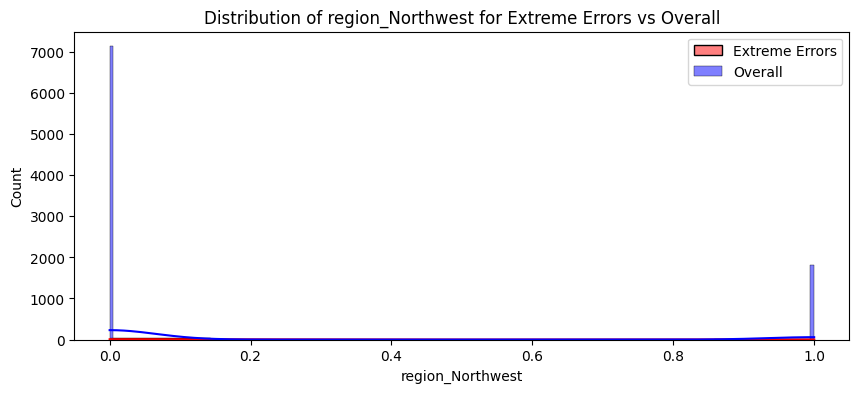

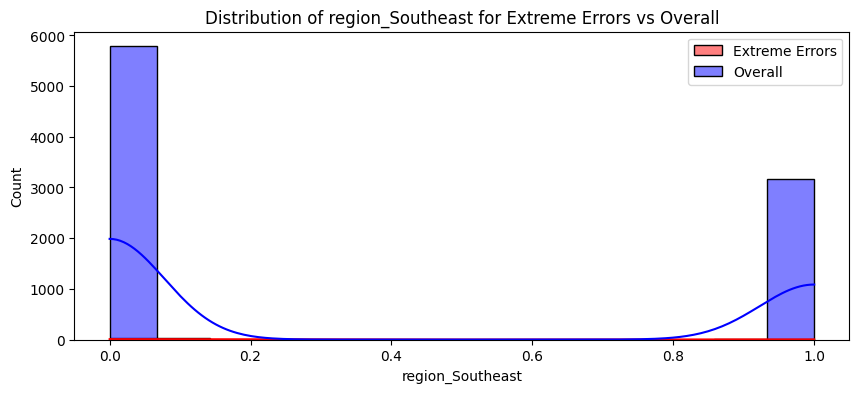

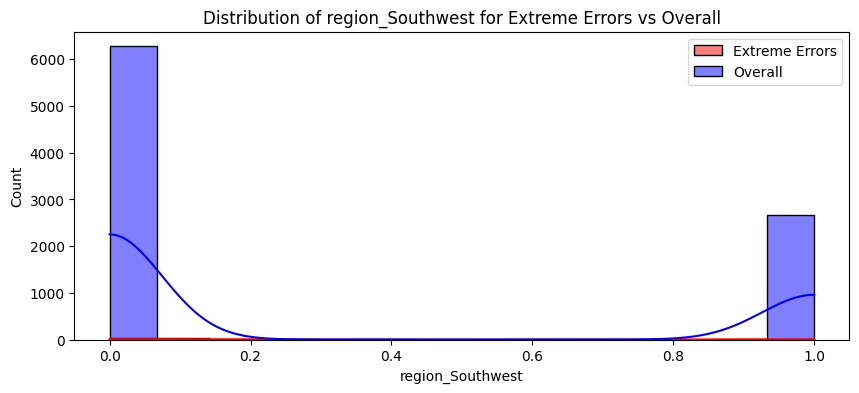

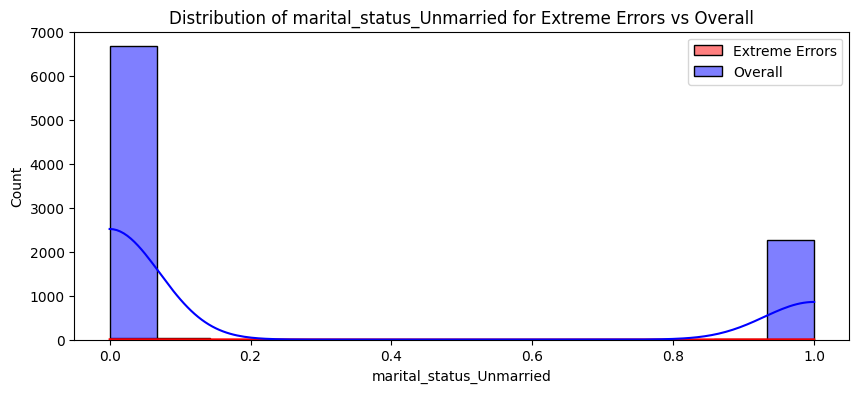

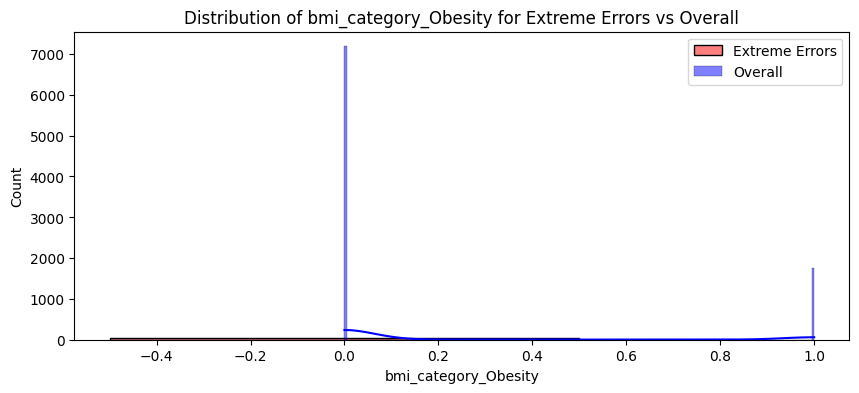

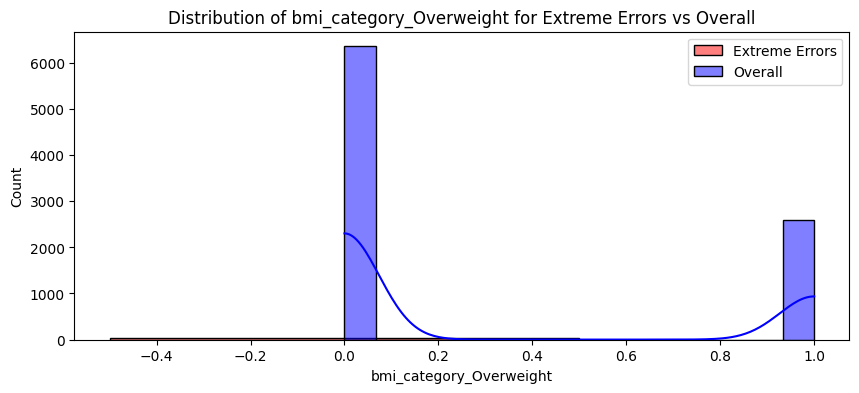

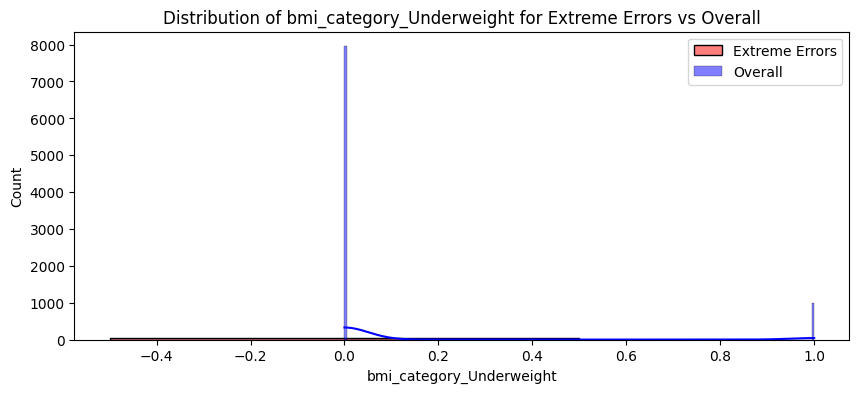

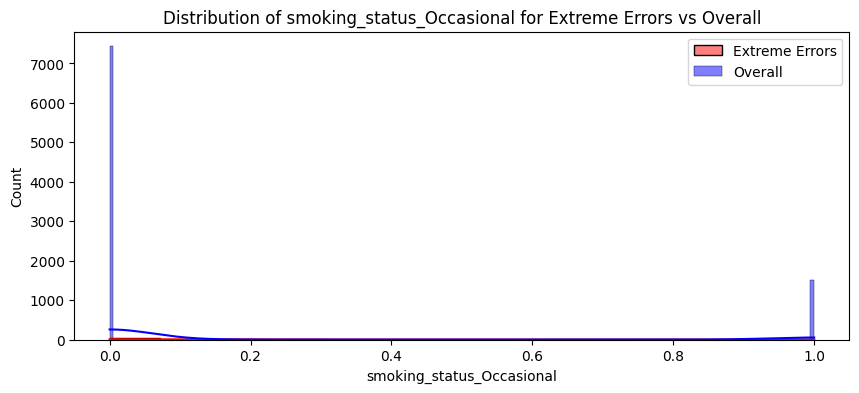

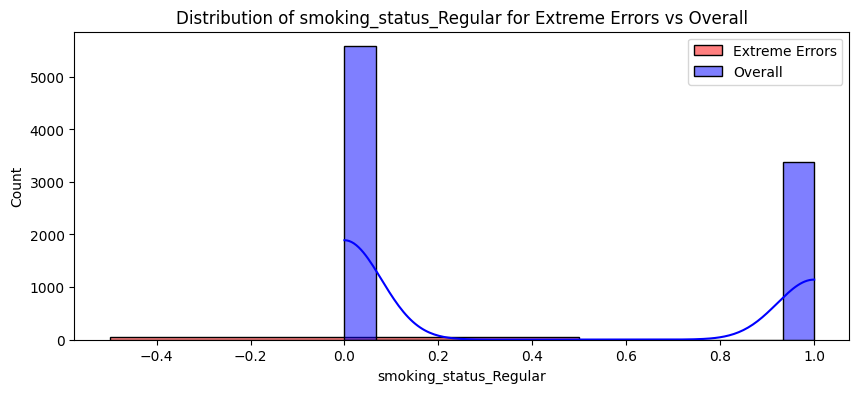

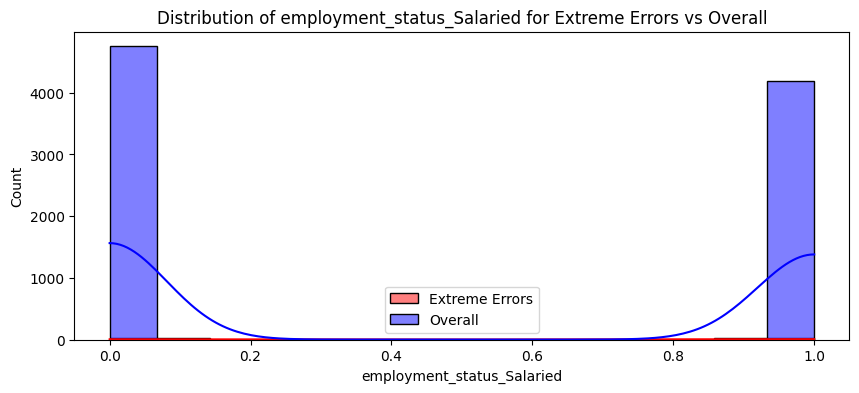

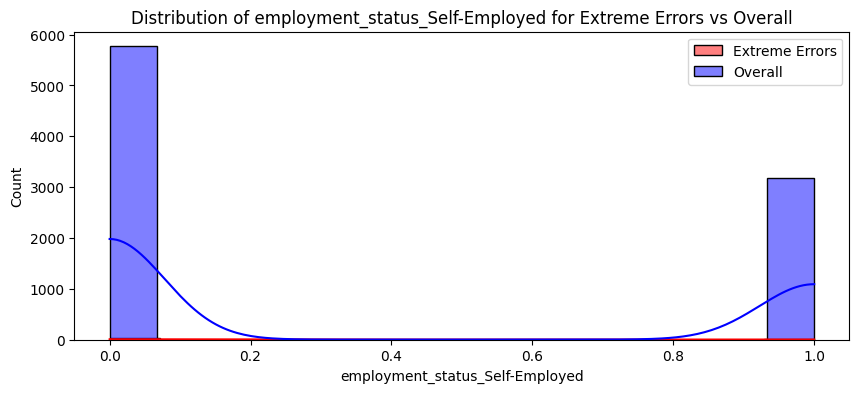

In [88]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', alpha=0.5, kde=True)
    plt.legend()
    plt.title(f'Distribution of {feature} for Extreme Errors vs Overall')
    plt.show()

- Age showing that there is hue error in lower age group

<Axes: xlabel='age', ylabel='Count'>

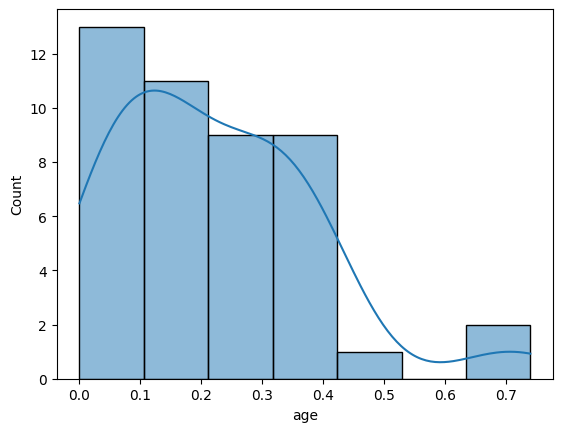

In [89]:
sns.histplot(extreme_error_df.age, kde=True   )

### 7.4 Reverse Scaling
- Scaling back using the same scaler
- Income Level was removed to need to keep back

In [90]:
extreme_error_df['income_level']=-1

In [91]:
df_reversed = pd.DataFrame()
df_reversed[cols_to_scale] = scaler.inverse_transform(extreme_error_df[cols_to_scale])
df_reversed.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk
0,33.0,3.0,-2.0,7.0,1.0,0.0
1,29.0,3.0,-2.0,3.0,1.0,0.0
2,28.0,1.0,-2.0,3.0,1.0,0.0
3,57.0,3.0,-2.0,39.0,1.0,0.0
4,36.0,0.0,-2.0,31.0,1.0,0.0


<Axes: xlabel='age', ylabel='Count'>

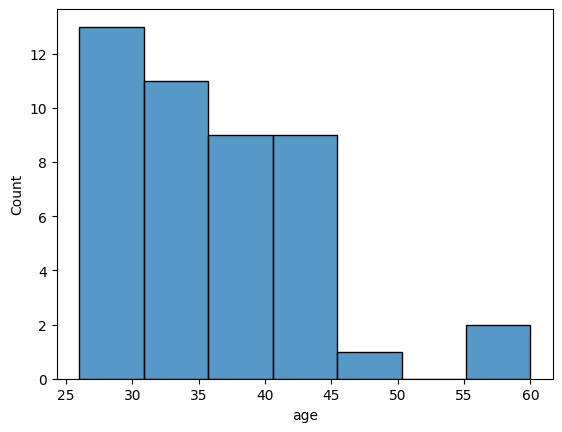

In [92]:
sns.histplot(df_reversed.age)

In [93]:
df_reversed.age.quantile(0.97)

np.float64(53.48)

- This shows that majority of the extreme errors are coming from young age group (i.e. <25 years of age). We need to may be build a separate model for this segment

## 8. Export Model

In [94]:
from joblib import dump

dump(best_model, "app/artifacts/model_rest.joblib")

['app/artifacts/model_rest.joblib']

In [95]:
scaler_with_cols ={
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [96]:
dump(scaler_with_cols,'app/artifacts/scaler_rest.joblib')

['app/artifacts/scaler_rest.joblib']